Random Forest to predict popularity

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

In [37]:
df = pd.read_csv('preprocess_project.csv')
df.head()

,day_elapse,achievements,average_playtime,median_playtime,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,Web Publishing.1,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,popularity
0,-3.511424,-0.128306,0.356428,0.278245,-0.163585,0.848583,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Popular
1,0.321652,-0.125470,-0.081995,-0.062050,-0.138187,-0.838904,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Low popularity
2,-0.093255,-0.102786,-0.081995,-0.062050,-0.138187,-0.666358,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Low popularity
3,0.285685,-0.128306,-0.081995,-0.062050,-0.569945,1.222322,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Low popularity
4,-3.208272,0.004965,0.921834,1.167432,0.369764,0.602712,0,1,1,0,...,0,0,0,0,0,0,0,0,0,Popular


In [38]:
(df_train,df_test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [39]:

# X_train = df_train.drop('popularity', axis = 1).drop('positive_ratings', axis = 1)
# y_train = df_train['popularity']
# X_test = df_test.drop('popularity', axis = 1).drop('positive_ratings', axis = 1)
# y_test = df_test['popularity']
X_train = df_train.drop('popularity', axis = 1)
y_train = df_train['popularity']
X_test = df_test.drop('popularity', axis = 1)
y_test = df_test['popularity']

In [40]:
X_train.head()

,day_elapse,achievements,average_playtime,median_playtime,price,positive_percentage,english_0,english_1,required_age_0,required_age_3,...,Warhammer 40K,Web Publishing.1,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
9267,0.392302,-0.128306,-0.081995,-0.062050,-0.506452,-1.988433,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
19313,0.015931,-0.105621,-0.081995,-0.062050,-0.417560,-0.106266,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
26925,0.967777,-0.082937,-0.081995,-0.062050,-0.112790,1.222322,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
121,0.820055,-0.128306,-0.081995,-0.062050,-0.506452,0.718674,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2092,-0.460635,0.004965,0.179636,0.098539,0.115788,0.299195,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train.head()

9267     Low popularity
19313    Low popularity
26925    Low popularity
121      Low popularity
2092            Popular
Name: popularity, dtype: object


         best B = {'n_estimators': 180}
  validation R2 = 0.831


<AxesSubplot:xlabel='trees'>

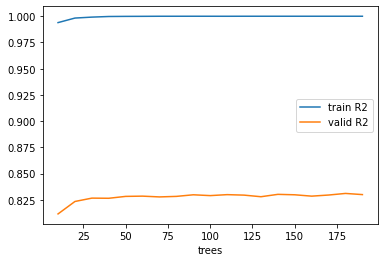

In [42]:
B = np.arange(10,200,10)
grid = {'n_estimators':B}

rf = RandomForestClassifier()
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(X_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='trees',y='train R2')
results.plot.line(x='trees',y='valid R2',ax=ax1)

In [43]:
print('test R2',rfCV.score(X_test,y_test).round(3))

test R2 0.833


Baseline was: 0.687

(18596/df['popularity'].count()).round(3)


Random forest did pretty well

Lets try to refine the grid


         best B = {'n_estimators': 120}
  validation R2 = 0.831


<AxesSubplot:xlabel='trees'>

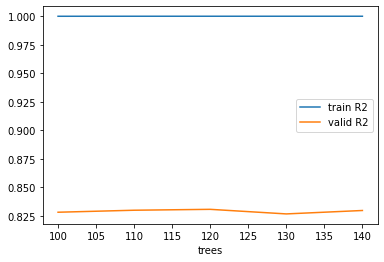

In [44]:
B = np.arange(100,150,10)
grid = {'n_estimators':B}

rf = RandomForestClassifier()
rfCV = GridSearchCV(rf,param_grid=grid,return_train_score=True,n_jobs=-1)
rfCV.fit(X_train,y_train)

print()
print('         best B =',rfCV.best_params_)
print('  validation R2 =',rfCV.best_score_.round(3))

results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV.cv_results_['mean_train_score']
results['valid R2']  = rfCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='trees',y='train R2')
results.plot.line(x='trees',y='valid R2',ax=ax1)

In [45]:
print('test R2',rfCV.score(X_test,y_test).round(3))

test R2 0.83


The test score is the same as with 130

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
yh = rfCV.predict(X_test)

In [48]:
y = y_test.astype('category')
cols = y.cat.categories
M = confusion_matrix(y, yh)
ConfusionMatrix = pd.DataFrame(M, index=cols, columns=cols)
ConfusionMatrix['total'] = ConfusionMatrix.sum(axis=1)
ConfusionMatrix

,Average,Low popularity,Popular,total
Average,363,406,189,958
Low popularity,135,3558,30,3723
Popular,123,36,575,734


The confusion matrix is similar to the logistic regression, just more accurate this time, 

popular has become reached a good level of accuracy only confusing 32 of 733 with low popularity despite it being the most common category by far

Average is similar with predicting more as low popularity, but it does a little better this time

In [49]:
rfCV.best_score_

0.8307479224376731

In [50]:
rf=rfCV.best_estimator_

In [51]:
feature_importance=pd.Series(rf.feature_importances_, index=X_train.columns)

In [52]:
feature_importance.sort_values(ascending=False)


median_playtime        1.351915e-01
day_elapse             1.299937e-01
average_playtime       1.240018e-01
positive_percentage    6.787534e-02
price                  5.012242e-02
                           ...     
Logic                  3.075252e-08
Epic                   4.397946e-09
Beautiful              2.417147e-09
NSFW                   1.729129e-09
Mystery Dungeon        0.000000e+00
Length: 414, dtype: float64

<AxesSubplot:>

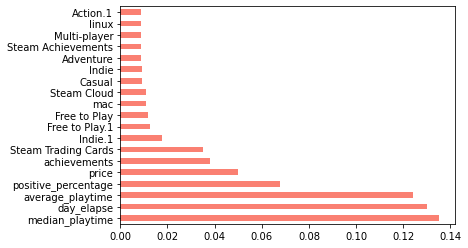

In [53]:
feature_importance.sort_values(ascending=False)[0:19].plot.barh(color="salmon")
